In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

In [ ]:
train_df=pd.read_csv('/Users/piyushagarwal/Documents/Python Files/Mock Dataset/train (1).csv')
test_df=pd.read_csv('/Users/piyushagarwal/Documents/Python Files/Mock Dataset/test (1).csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15658852.0,Chidimma,651.0,France,Female,35.0,4.0,132271.30,1.0,1.0,0.0,86587.37,0.0
1,1,15615176.0,Chukwubuikem,642.0,France,Male,35.0,7.0,0.00,2.0,1.0,1.0,83917.49,0.0
2,2,15771543.0,Macleod,662.0,France,Female,42.0,4.0,0.00,3.0,0.0,0.0,52337.97,1.0
3,3,15776824.0,Hs?,659.0,France,Female,38.0,5.0,121702.73,1.0,0.0,0.0,73564.44,0.0
4,4,15676937.0,Ts'ui,584.0,Spain,Male,47.0,7.0,0.00,2.0,1.0,1.0,86619.77,0.0


In [ ]:
train_df.drop(['id','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,651.0,France,Female,35.0,4.0,132271.30,1.0,1.0,0.0,86587.37,0.0
1,642.0,France,Male,35.0,7.0,0.00,2.0,1.0,1.0,83917.49,0.0
2,662.0,France,Female,42.0,4.0,0.00,3.0,0.0,0.0,52337.97,1.0
3,659.0,France,Female,38.0,5.0,121702.73,1.0,0.0,0.0,73564.44,0.0
4,584.0,Spain,Male,47.0,7.0,0.00,2.0,1.0,1.0,86619.77,0.0


In [ ]:
train_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
train_df.duplicated().sum()

0

In [ ]:
train_df.nunique()

CreditScore         372
Geography             3
Gender                2
Age                  55
Tenure               11
Balance            3334
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    6215
Exited                2
dtype: int64

In [ ]:
train_df['Geography'].value_counts()

Geography
France     9066
Spain      3257
Germany    2677
Name: count, dtype: int64

In [ ]:
train_df['Gender'].value_counts()

Gender
Male      8413
Female    6587
Name: count, dtype: int64

In [ ]:
train_df['NumOfProducts'].value_counts()

NumOfProducts
2.0    8293
1.0    6490
3.0     179
4.0      38
Name: count, dtype: int64

In [ ]:
train_df['HasCrCard'].value_counts()

HasCrCard
1.0    11762
0.0     3238
Name: count, dtype: int64

In [ ]:
train_df['IsActiveMember'].value_counts()

IsActiveMember
0.0    7616
1.0    7384
Name: count, dtype: int64

In [ ]:
train_df['Exited'].value_counts()

Exited
0.0    11977
1.0     3023
Name: count, dtype: int64

In [ ]:
df_encoded = pd.get_dummies(train_df, columns=['Gender', 'Geography'], drop_first=True, dtype=int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        15000 non-null  float64
 1   Age                15000 non-null  float64
 2   Tenure             15000 non-null  float64
 3   Balance            15000 non-null  float64
 4   NumOfProducts      15000 non-null  float64
 5   HasCrCard          15000 non-null  float64
 6   IsActiveMember     15000 non-null  float64
 7   EstimatedSalary    15000 non-null  float64
 8   Exited             15000 non-null  float64
 9   Gender_Male        15000 non-null  int64  
 10  Geography_Germany  15000 non-null  int64  
 11  Geography_Spain    15000 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 1.4 MB


In [ ]:
train_df=df_encoded
train_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,651.0,35.0,4.0,132271.30,1.0,1.0,0.0,86587.37,0.0,0,0,0
1,642.0,35.0,7.0,0.00,2.0,1.0,1.0,83917.49,0.0,1,0,0
2,662.0,42.0,4.0,0.00,3.0,0.0,0.0,52337.97,1.0,0,0,0
3,659.0,38.0,5.0,121702.73,1.0,0.0,0.0,73564.44,0.0,0,0,0
4,584.0,47.0,7.0,0.00,2.0,1.0,1.0,86619.77,0.0,1,0,1


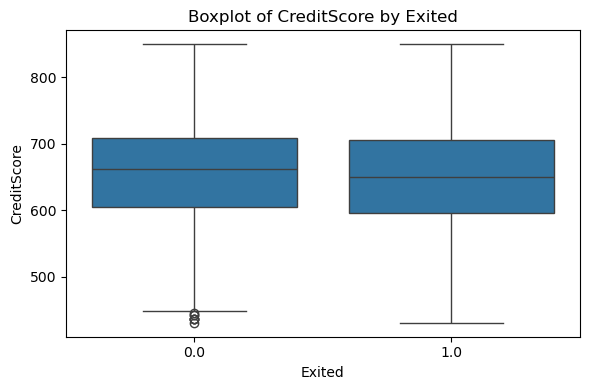

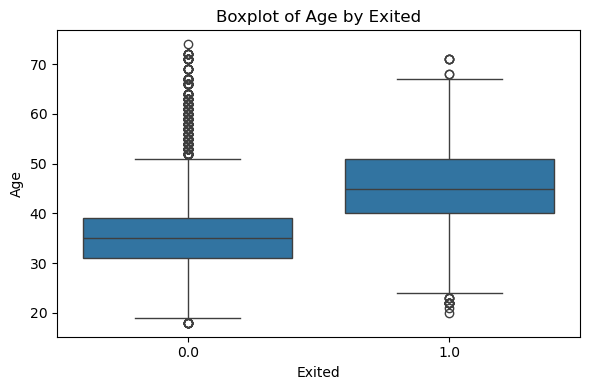

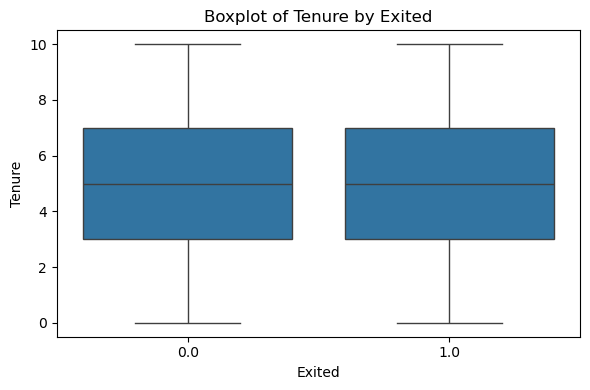

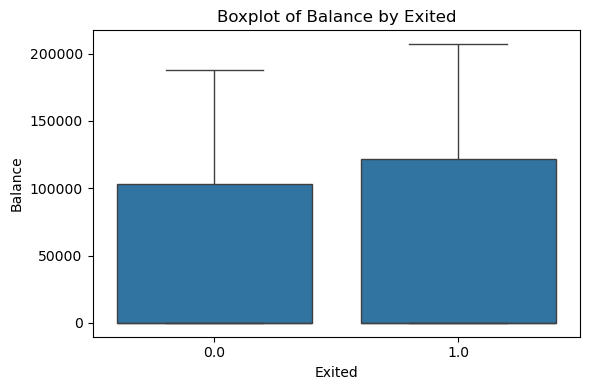

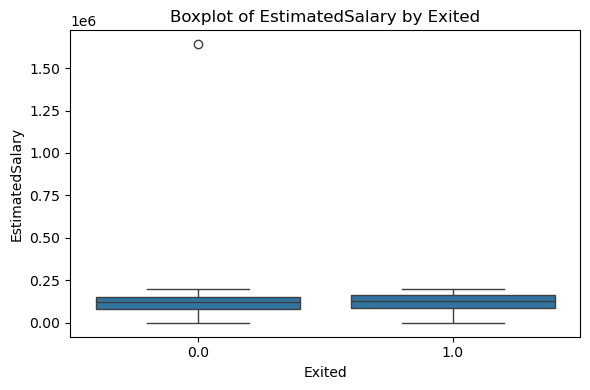

In [ ]:
category_col = 'Exited'
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=category_col, y=col, data=train_df)
    plt.title(f'Boxplot of {col} by {category_col}')
    plt.xlabel(category_col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = remove_outliers_iqr(train_df, numeric_cols)

print(f"Before: {train_df.shape[0]} rows, After: {df_clean.shape[0]} rows")

Before: 15000 rows, After: 14567 rows


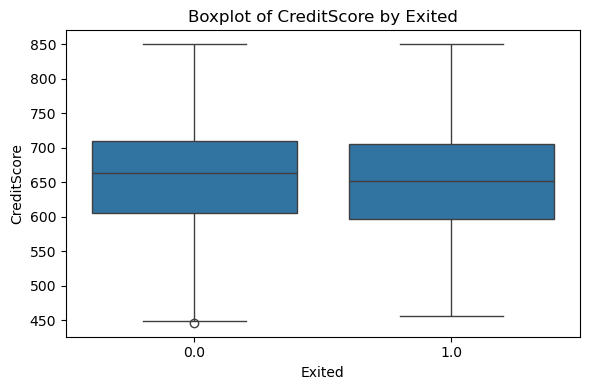

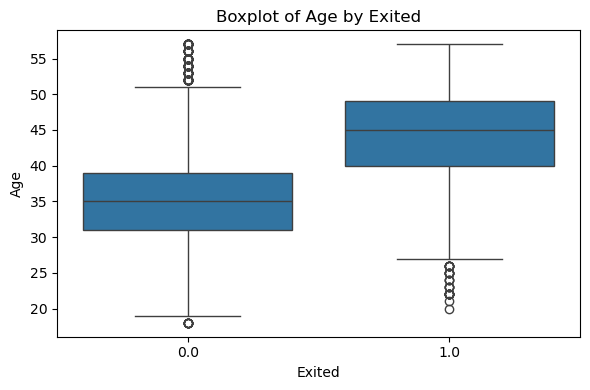

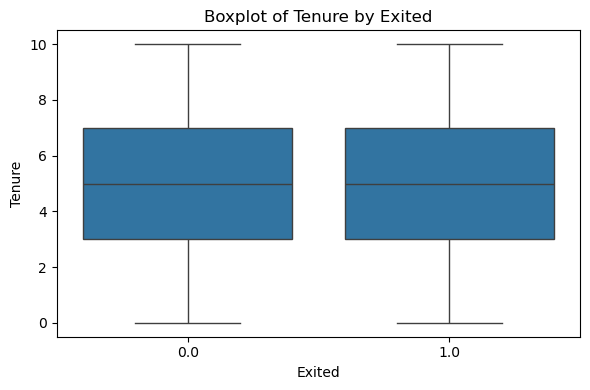

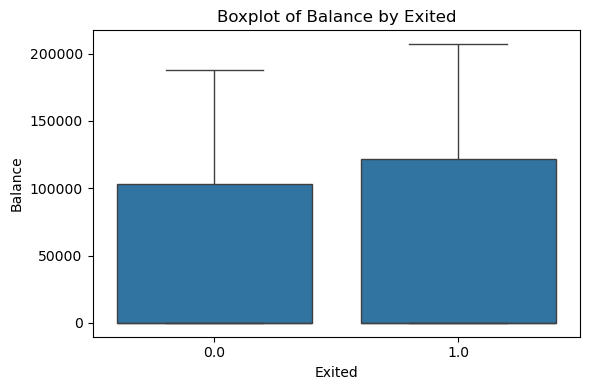

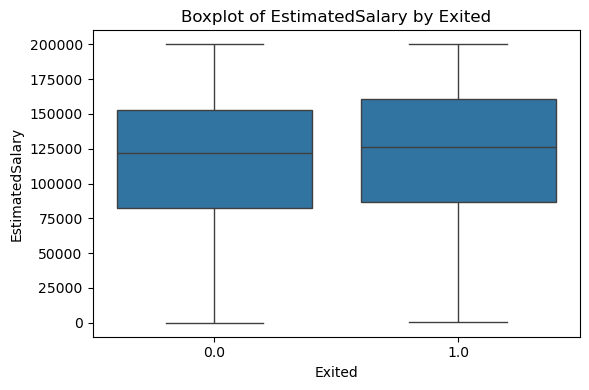

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=category_col, y=col, data=df_clean)
    plt.title(f'Boxplot of {col} by {category_col}')
    plt.xlabel(category_col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

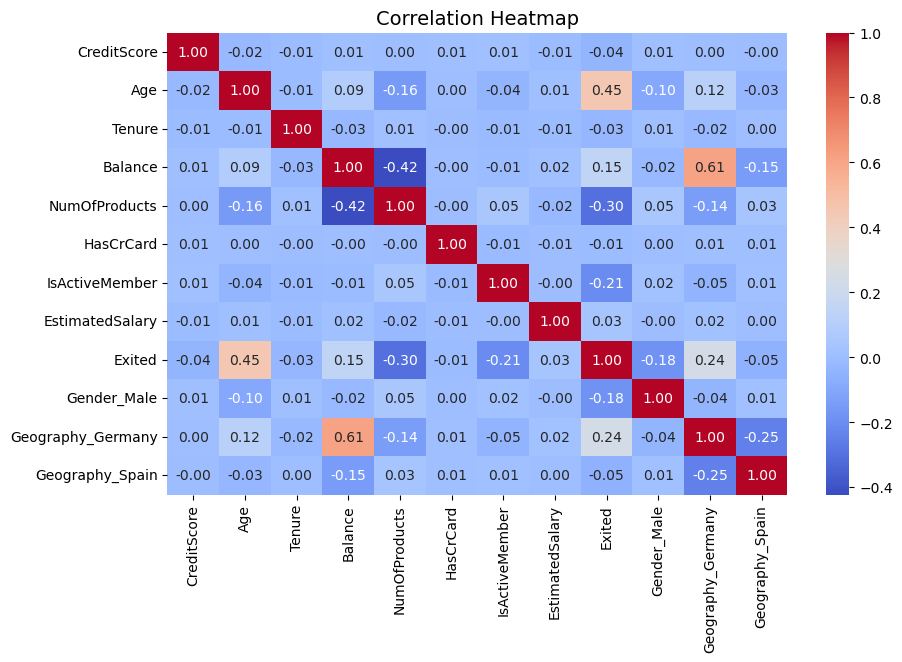

In [ ]:
corr=train_df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [ ]:
X = train_df.drop('Exited', axis=1)
y = train_df['Exited']

In [ ]:
# if numerical data, use StandardScler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [ ]:
# comparing logistic regression and random forest classifier
#optional
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
f1score = f1_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1score:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8364
ROC-AUC Score: 0.8364
F1 Score: 0.8365
Confusion Matrix:
[[2001  395]
 [ 389 2006]]


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()

# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]
# }

# grid = GridSearchCV(
#      estimator=model,
#      param_grid=param_grid,
#      scoring='accuracy',
#      cv=3,
#      verbose=2,
#      n_jobs=-1
# )


# grid.fit(X_train, y_train)
# print("Best Parameters:", grid.best_params_)
# print("Best Cross-Validation Score:", grid.best_score_)
# best_model = grid.best_estimator_
# y_pred = best_model.predict(X_val)

# The best parameters from above grid search are:
# {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
f1score = f1_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1score:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9292
ROC-AUC Score: 0.9292
F1 Score: 0.9289
Confusion Matrix:
[[2236  160]
 [ 179 2216]]


Final Selected Model is RF, now retraining it on whole training dataset and setting oob_score= True

In [ ]:
rf=RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features='sqrt',oob_score=True, random_state=42)
rf.fit(X_scaled, y_res)

,n_estimators,100
,criterion,'gini'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1015.8+ KB


In [ ]:
test_ids = test_df['id']
test_df.drop(['id','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
test_df.duplicated().sum()

0

In [ ]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23954 entries, 0 to 23953
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        23954 non-null  float64
 1   Age                23954 non-null  float64
 2   Tenure             23954 non-null  float64
 3   Balance            23954 non-null  float64
 4   NumOfProducts      23954 non-null  float64
 5   HasCrCard          23954 non-null  float64
 6   IsActiveMember     23954 non-null  float64
 7   EstimatedSalary    23954 non-null  float64
 8   Gender_Male        23954 non-null  int64  
 9   Geography_Germany  23954 non-null  int64  
 10  Geography_Spain    23954 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 2.0 MB


In [ ]:
df_encoded = pd.get_dummies(test_df, columns=['Gender', 'Geography'], drop_first=True, dtype=int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  float64
 6   IsActiveMember     10000 non-null  float64
 7   EstimatedSalary    10000 non-null  float64
 8   Gender_Male        10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int64  
 10  Geography_Spain    10000 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 859.5 KB


In [ ]:
X_test=df_encoded
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  float64
 6   IsActiveMember     10000 non-null  float64
 7   EstimatedSalary    10000 non-null  float64
 8   Gender_Male        10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int64  
 10  Geography_Spain    10000 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 859.5 KB


In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_pred=rf.predict_proba(X_test_scaled)

In [ ]:
sub_df = pd.DataFrame({
    'id': test_ids,
    'Exited': y_pred[:,1]
})
sub_df.to_csv('submission_Bank.csv', index=False,float_format='%.6f')